In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
from scipy import optimize
import math
from matplotlib.patches import Polygon

from RoutePlanner.Mesh import Mesh
from RoutePlanner.Plot import PlotRegion, PlotRegionPath
from RoutePlanner.Path import dijkstra

In [2]:
IceExtent = {}
IceExtent['X']      = np.load('./resources/IceContent_X.npy') 
IceExtent['Y']      = np.load('./resources/IceContent_Y.npy') 
IceExtent['Values'] = np.load('./resources/IceContent_V.npy') 
IceExtent['Mask']   = np.load('./resources/IceContent_mask.npy') 
vls = IceExtent['Values']
vls[IceExtent['Mask']] = 1.0
IceExtent['Values'] = vls


Coastline = {}
Coastline['X']      = np.load('./resources/IceContent_X.npy') 
Coastline['Y']      = np.load('./resources/IceContent_Y.npy')
values = np.load('./resources/IceContent_V.npy'); values[values < 1] = 0
Coastline['Values'] = values

Currents = {}
Currents['X']  =  np.load('./resources/Current_X.npy') 
Currents['Y']  =  np.load('./resources/Current_Y.npy') 
Currents['Vx'] = np.load('./resources/Current_Vx.npy')
Currents['Vy'] = np.load('./resources/Current_Vy.npy')

Waypoints = pd.read_csv('./resources/WayPoints.csv')

In [3]:
MeshInfo = {}
MeshInfo['Xmin'] = 260
MeshInfo['Xmax'] = 360
MeshInfo['Ymin'] = -75
MeshInfo['Ymax'] = -40
MeshInfo['dx']   = 5
MeshInfo['dy']   = 2.5

MeshInfo['CoastMask'] = {}
MeshInfo['CoastMask']['X']          = Coastline['X'] 
MeshInfo['CoastMask']['Y']          = Coastline['Y'] 
MeshInfo['CoastMask']['Mask']       = Coastline['Values'].astype(bool)
MeshInfo['CoastMask']['Split']      = True
MeshInfo['CoastMask']['SplitDepth'] = 3

MeshInfo['IceExtent'] = {}
MeshInfo['IceExtent']['X']          = IceExtent['X'] 
MeshInfo['IceExtent']['Y']          = IceExtent['Y'] 
MeshInfo['IceExtent']['Values']     = IceExtent['Values']
MeshInfo['IceExtent']['Mask']       = IceExtent['Mask']
MeshInfo['IceExtent']['Split']      = True 
MeshInfo['IceExtent']['SplitDepth'] = 3
MeshInfo['IceExtent']['SplitDiff']  = 0.1
MeshInfo['IceExtent']['MaxProportion'] = 0.8

MeshInfo['Currents'] = {}
MeshInfo['Currents']['X']  = Currents['X'] 
MeshInfo['Currents']['Y']  = Currents['Y']
MeshInfo['Currents']['Vx'] = Currents['Vx'] 
MeshInfo['Currents']['Vy'] = Currents['Vy'] 


MeshInfo['WayPoints'] = Waypoints
MeshInfo['VehicleInfo'] = {}
MeshInfo['VehicleInfo']['Speed'] = 26.3


### Generating Mesh from Land & Ice Content

In [4]:
ms_Ice_Land = Mesh(MeshInfo)
ms_Ice_Land.IceInformation()
ms_Ice_Land.VectorInformation()


=============== Initialising Mesh ================
Xmin=260,Xmax=360,dX=5  Ymin=-75,Ymax=-40,dY=2.5

============ GRIDDING LAND INFORMATION ===========
~~~~~~~~ Initialising Original Mask Array ~~~~~~~~
~~~~~~~~ Splitting Mask array based on Coast ~~~~~~~~
-----> Max Depth=3

============ GRIDDING ICE INFORMATION ===========
~~~~~~~~ Initialising Original Mask Array ~~~~~~~~
~~~~~~~~  Splitting Mask array based on Ice Content ~~~~~~~~
-----> Max Depth=3

============ GRIDDING Current Data ===============


c:\Users\jonsmi\Documents\BAS_RoutePlanner\Jan_2022\Python\RoutePlanner\RoutePlanner\Mesh.py:235: RuntimeWarning: Mean of empty slice
  self.cells[cc].vector = np.array([np.nanmean(gVx),np.nanmean(gVy)])


### Plotting Generated Mesh

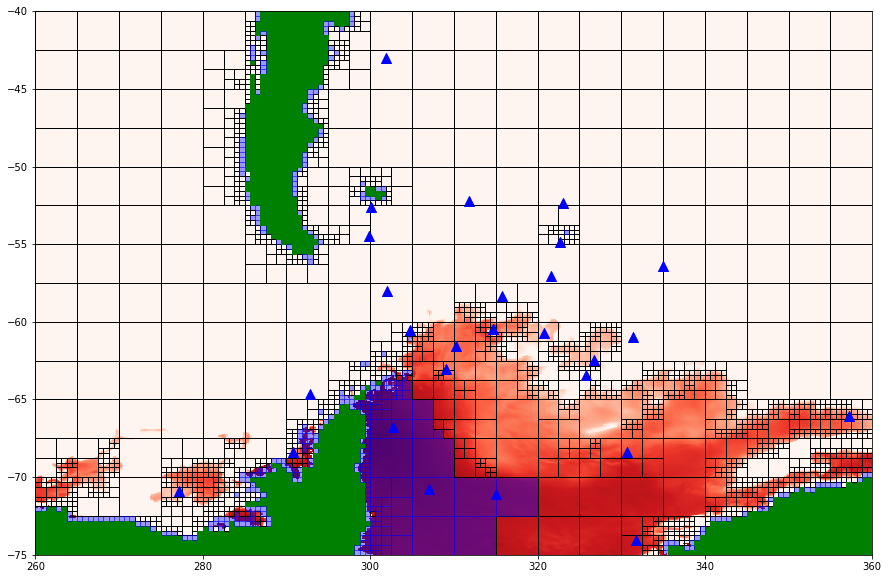

In [ ]:
PlotRegion(ms_Ice_Land)

### Running Dijkstra

In [6]:
DijkstraInfo = dijkstra(ms_Ice_Land,0)

### Plotting the Paths for some random Cells

AttributeError: 'Mesh' object has no attribute 'meshinf'

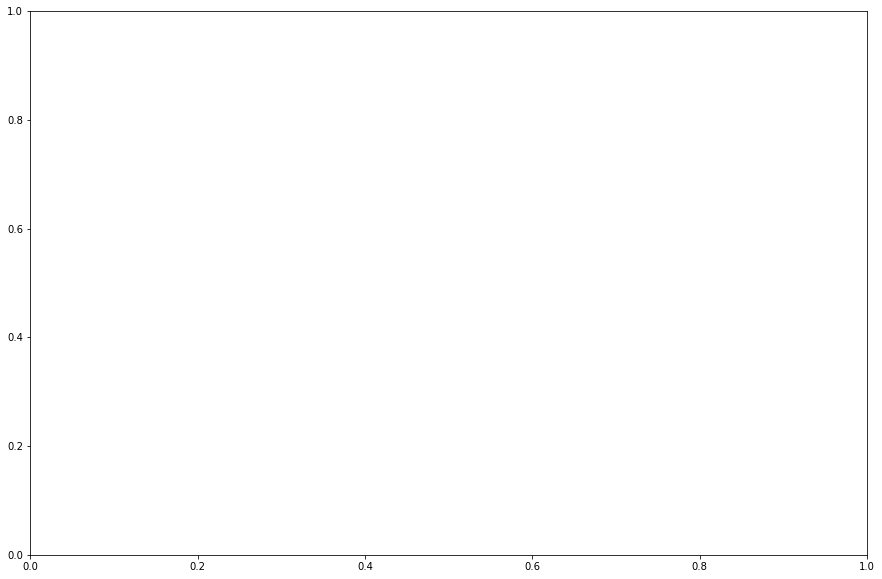

In [8]:
PlotRegionPath(ms_Ice_Land,DijkstraInfo,[100,110,150])